# Arbres Binaires de Recherche

### Motivation

A quoi servent les arbres binaires de recherche ?


### Définition (Arbre binaire de recherche)
*N'hésitez pas à ajouter des définitions préliminaires.*

### Exemples

*Donner au moins un exemple et un contre-exemple*

### Implémentation

Implanter les fonctions `taille`, `profondeur`, `est_present`, `insertion`, `est_binaire_de_recherche` dans la classe Noeud. Les tester sur des exemples.

In [1]:
class Noeud:
    def __init__(self, cle, gauche = None, droit = None):
        self.cle = cle
        if gauche != None:
            if not isinstance(gauche, Noeud):
                raise TypeError("gauche doit être un Noeud, pas %s" % gauche)
            self.gauche = gauche
        else:
            self.gauche = None
        if droit != None:
            if not isinstance(droit, Noeud):
                raise TypeError("droit doit être un Noeud, pas %s" % droit)
            self.droit = droit
        else:
            self.droit = None

    def __repr__(self):
        return "Noeud(\t%s,\n\t%s,\n\t%s\n)" % (self.gauche.__repr__(), self.cle, self.droit.__repr__())

    def __str__(self):
        return "Noeud(%s)" % self.cle

    def possede_enfant_gauche(self):
        """ Noeud -> bool
        Renvoie vrai si et seulement si self possède un enfant à gauche"""
        return self.gauche != None

    def possede_enfant_droit(self):
        """ Noeud -> bool
        Renvoie vrai si et seulement si self possède un enfant à droite"""
        return self.droit != None

    def export_vers_dot(self):
        """ Noeud -> str
        Renvoie la description au format dot du noeud et de ses enfants"""
        s = ""
        if self.possede_enfant_gauche():
            s += '"%s" -> "%s";\n' % (str(self), str(self.gauche))
            s += self.gauche.export_vers_dot()
        if self.possede_enfant_droit():
            s += '"%s" -> "%s";\n' % (str(self), str(self.droit))
            s += self.droit.export_vers_dot()
        return s

    
    def taille(self):
        """ """
        return NotImplemented
        
    def profondeur(self):
        """ """
        return NotImplemented
    
    def est_present(self, cle):
        """ """
    
    def insertion(self, cle):
        """ """
        # l'implémentation suivante est fausse, mais elle permet de créer des arbres.
        courant = self
        while(courant.gauche is not None):
            courant = courant.gauche
        courant.gauche = Noeud(cle)
    
    def est_binaire_de_recherche():
        """ """
        return NotImplemented
    
    

class ArbreBinaireRecherche:
    def __init__(self, *args):
        self.racine = None

        if len(args) == 1:
            if isinstance(args[0], Noeud):
                self.racine = args[0]
            else:
                for e in args[0]:
                    self.insertion(e)

    def export_vers_dot(self):
        """ ArbreBinaireRecherche -> str
        Renvoie la description au format dot de l'Arbre Binaire"""
        return "digraph BST{\n%s}" % self.racine.export_vers_dot()

    def insertion(self, cle):
        """ ArbreBinaireRecherche -> ()
        Insère cle dans l'ArbreBinaireRecherche self"""
        if self.racine == None:
            self.racine = Noeud(cle)
        else:
            self.racine.insertion(cle)

    def taille(self):
        """ ArbreBinairerecherche -> int
        Renvoie la taille de l'arbre self"""
        return self.racine.taille()

    def profondeur(self):
        """ Arbrebinairerecherche -> int
        Renvoie la profondeur de l'arbre self"""
        return self.racine.profondeur()

In [2]:
# Il y a deux manières de construires des arbres binaires de recherche
# Soit en donnant la liste des clés, qui sont ensuite insérées une par une dans l'arbre
# Soit en donnant un noeud qui sera la racine de l'arbre
arbre1 = ArbreBinaireRecherche([0,1,2])
arbre2 = ArbreBinaireRecherche([12,10,14,9,11,13,15])
arbre3 = ArbreBinaireRecherche(Noeud(1, Noeud(0), Noeud(2)))

### Export vers dot

Tester le code ci-dessous. S'il ne marche pas, essayer un site tel que [GraphViz Online](https://dreampuf.github.io/GraphvizOnline/) (avec le contenu de `texte_dot` par exemple`).

Texte descriptif dot: digraph BST{
"Noeud(1)" -> "Noeud(0)";
"Noeud(1)" -> "Noeud(2)";
}


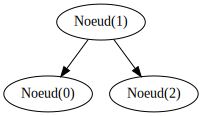

In [3]:
from graphviz import Source

texte_dot = arbre3.export_vers_dot()
print("Texte descriptif dot: %s" % texte_dot)
dot = Source(texte_dot)
display(dot)

### Complexité

Quelle est la complexité de `recherche`, `insertion` ?

## Arbres Rouge-Noir

### Motivation
Quels sont les avantages et les inconvénients des arbres rouge-noir par rapport aux arbres binaires de recherche ?


### Définition (Arbre rouge-noir)
*N'hésitez pas à ajouter des définitions préliminaires.*

### Profondeur maximale 
Considérons un arbre rouge-noir avec $n$ noeuds. Quelle est sa profondeur maximale (le prouver) ?

### Exemples
*Donner au moins un exemple et un contre-exemple*

### Implémentation
Implanter les fonctions `taille_noire`, `est_rouge_noir`, `insertion`. Les tester sur des exemples.

In [4]:
class NoeudRN(Noeud):
    def __init__(self, cle, est_noir = True, gauche = None, droit = None):
        super().__init__(cle, gauche, droit)
        if isinstance(est_noir, bool):
            self.est_noir = est_noir
        else:
            raise TypeError("est_noir doit être un booléen, pas %s" % est_noir)
            
    def __repr__(self):
        if self.est_noir:
            return "NoeudN(\t%s,\n\t%s,\n\t%s\n)" % (self.gauche.__repr__(), self.cle, self.droit.__repr__())        
        else:
            return "NoeudR(\t%s,\n\t%s,\n\t%s\n)" % (self.gauche.__repr__(), self.cle, self.droit.__repr__())
            
    def __str__(self):
        return "NoeudRN(%s)" % self.cle
    
    def export_vers_dot(self):
        """ NoeudRN -> str
        Renvoie la description au format dot du noeud et de ses enfants"""
        s = ""
        if not self.est_noir:
            s += '"%s"[style=filled, color="red"];\n' % str(self)
        if self.possede_enfant_gauche():
            s += '"%s" -> "%s";\n' % (str(self), str(self.gauche))
            s += self.gauche.export_vers_dot()
        if self.possede_enfant_droit():
            s += '"%s" -> "%s";\n' % (str(self), str(self.droit))
            s += self.droit.export_vers_dot()
        return s
    
    def taille_noire(self):
        """ """
        
    def est_rouge_noir():
        """ """
    
    def insertion(self, cle):
        """ """

class ArbreRougeNoir(ArbreBinaireRecherche):
    def insertion(self, cle):
        """ ArbreRougeNoir -> ()
        Insère cle dans l'ArbreBinaireRecherche self"""
        if self.racine == None:
            self.racine = NoeudRN(cle)
        else:
            self.racine.insertion(cle)
            
    def taille_noire(self):
        """ ArbreRougeNoir -> int
        Renvoie la taille noire depuis la racine"""
        return self.racine.taille_noire()

### Exemples

In [5]:
arbre = ArbreRougeNoir([0, 1, 2])

dot = Source(arbre.export_vers_dot())
display(dot)

### Complexité

Quelle est la complexité de l'insertion ? Pourquoi ?

La fonction recherche définie sur les noeuds non-colorés fonctionne-t-elle ici ? Quelle est sa complexité ?

# Bibliographie